In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Binary F-RCNN (first stage)

## Loss and Accuracy

In [3]:
f_rcnn_first_stage = pd.read_csv('./results/f_rcnn/first_stage/first_stage_training.csv', index_col=['epoch']).drop('Unnamed: 0', axis=1)

In [6]:
f_rcnn_first_stage.head(2)

,class_acc,curr_loss,loss_class_cls,loss_class_regr,loss_rpn_cls,loss_rpn_regr,"mean_overlapping_bboxes,",val_class_acc,val_curr_loss,val_loss_class_cls,val_loss_class_regr,val_loss_rpn_cls,val_loss_rpn_regr,"val_mean_overlapping_bboxes,"
epoch,,,,,,,,,,,,,,
1,0.679688,2.032856,0.622056,0.452677,0.855341,0.102782,10.352000,0.663138,1.712778,0.624656,0.442809,0.543988,0.101326,10.965197
2,0.658188,1.658229,0.628255,0.434820,0.492422,0.102732,11.315369,0.680249,1.559882,0.635316,0.420919,0.403411,0.100236,12.000000


In [5]:
display(f_rcnn_first_stage.loc[f_rcnn_first_stage['val_curr_loss'].idxmin(),:])

class_acc                         0.877437
curr_loss                         0.561167
loss_class_cls                    0.280533
loss_class_regr                   0.178712
loss_rpn_cls                      0.031117
loss_rpn_regr                     0.070805
mean_overlapping_bboxes,         15.058000
val_class_acc                     0.857526
val_curr_loss                     0.789540
val_loss_class_cls                0.335263
val_loss_class_regr               0.213497
val_loss_rpn_cls                  0.155264
val_loss_rpn_regr                 0.085515
val_mean_overlapping_bboxes,     14.853828
Name: 43, dtype: float64

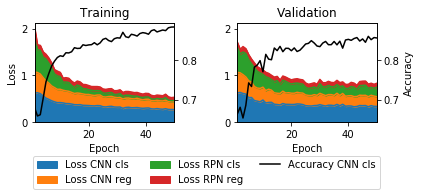

In [4]:
fig_first_stage, ax_first_stage = plt.subplots(nrows=1, ncols=2, figsize=(6.17,2.7))
sec_ax_first_stage = [ax.twinx() for ax in ax_first_stage]

f_rcnn_first_stage[['loss_class_cls', 'loss_class_regr', 'loss_rpn_cls', 'loss_rpn_regr']].plot.area(ax=ax_first_stage[0], legend=False)
f_rcnn_first_stage['class_acc'].plot(ax=sec_ax_first_stage[0], color='black')

f_rcnn_first_stage[['val_loss_class_cls', 'val_loss_class_regr', 'val_loss_rpn_cls', 'val_loss_rpn_regr']].plot.area(ax=ax_first_stage[1], legend=False)
f_rcnn_first_stage['val_class_acc'].plot(ax=sec_ax_first_stage[1], color='black')



#f_rcnn_first_stage[['curr_loss', 'val_curr_loss']].rename(columns={'curr_loss': 'Training Loss', 'val_curr_loss': 'Validation Loss'}).plot(ax=ax, style=[next(style_cycle), next(style_cycle)], color=[next(color_cycle), next(color_cycle)])
#f_rcnn_first_stage[['class_acc', 'val_class_acc']].rename(columns={'class_acc': 'Training Accuracy', 'val_class_acc': 'Validation Accuracy'}).plot(ax=sec_ax, style=[next(style_cycle), next(style_cycle)], color=[next(color_cycle), next(color_cycle)])
for ax in ax_first_stage:
    ax.set_xlabel('Epoch')
#    ax.set_ylabel('Total Loss')
#for ax in sec_ax_first_stage:
#    ax.set_ylabel('Accuracy')

ax_first_stage[0].set_ylabel('Loss')
sec_ax_first_stage[1].set_ylabel('Accuracy')

ax_first_stage[0].set_title('Training')
ax_first_stage[1].set_title('Validation')

def unified_ylims(ax1, ax2):
    ax1_y1, ax1_y2 = ax1.get_ylim()
    ax2_y1, ax2_y2 = ax2.get_ylim()
    return min(ax1_y1, ax2_y1), max(ax1_y2, ax2_y2)

for ax in ax_first_stage:
    ax.set_ylim(unified_ylims(ax_first_stage[0], ax_first_stage[1]))
for ax in sec_ax_first_stage:
    ax.set_ylim(unified_ylims(sec_ax_first_stage[0], sec_ax_first_stage[1]))
    
ax_first_stage[1].set_ylim(ax_first_stage[0].get_ylim())
sec_ax_first_stage[1].set_ylim(sec_ax_first_stage[0].get_ylim())

lines = ax_first_stage[0].legend().legendHandles
lines.append(sec_ax_first_stage[0].legend().legendHandles[0])
ax_first_stage[0].legend_.remove()
sec_ax_first_stage[0].legend_.remove()


lgd = fig_first_stage.legend(lines, 
                     ('Loss CNN cls', 'Loss CNN reg', 'Loss RPN cls', 'Loss RPN reg', 'Accuracy CNN cls'), 
                     bbox_to_anchor=(0.075, 0.09, 0.78, .102), loc=1, mode="expand", borderaxespad=0., ncol=3)

fig_first_stage.tight_layout()
fig_first_stage.subplots_adjust(bottom=0.35)
fig_first_stage.savefig('./results/f_rcnn/first_stage/plots/f_rcnn_1st_stage_loss_accuracy.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

* Note: dropout!

## Preprocessed images
This is about the cropping of images as input into the second stage. The question is how confident the model is with its projections and if there is a significant difference between those classes on which it trained and the others.

In [9]:
crop_first_stage_cls_prob_train = pd.read_csv('./results/f_rcnn/second_stage/crop_imgs_logs_train.csv', index_col=0)
crop_first_stage_cls_prob_val = pd.read_csv('./results/f_rcnn/second_stage/crop_imgs_logs_val.csv', index_col=0)
crop_first_stage_cls_prob_test = pd.read_csv('./results/f_rcnn/second_stage/crop_imgs_logs_test.csv', index_col=0)

crop_first_stage_cls_prob_train_50 = crop_first_stage_cls_prob_train[crop_first_stage_cls_prob_train.prob < 0.5]
crop_first_stage_cls_prob_val_50 = crop_first_stage_cls_prob_val[crop_first_stage_cls_prob_val.prob < 0.5]
crop_first_stage_cls_prob_test_50 = crop_first_stage_cls_prob_test[crop_first_stage_cls_prob_test.prob < 0.5]

### Percentage greater 90% certainty

In [29]:
pd.concat([(crop_first_stage_cls_prob_train > 0.9), 
           (crop_first_stage_cls_prob_val > 0.9), 
           (crop_first_stage_cls_prob_test > 0.9)], axis=1).mean()

prob    0.938491
prob    0.930308
prob    0.927252
dtype: float64

### Number less than 50% certainty

In [34]:
pd.concat([(crop_first_stage_cls_prob_train < 0.5), 
           (crop_first_stage_cls_prob_val < 0.5), 
           (crop_first_stage_cls_prob_test < 0.5)], axis=1).mean()

prob    0.009623
prob    0.010651
prob    0.012471
dtype: float64

In [30]:
pd.concat([(crop_first_stage_cls_prob_train < 0.5), 
           (crop_first_stage_cls_prob_val < 0.5), 
           (crop_first_stage_cls_prob_test < 0.5)], axis=1).sum()

prob    125.0
prob     46.0
prob     54.0
dtype: float64

In [10]:
# full
crop_train_groupby_bin = crop_first_stage_cls_prob_train.groupby(
    pd.cut(crop_first_stage_cls_prob_train['prob'], bins=10))['prob']

crop_val_groupby_bin = crop_first_stage_cls_prob_val.groupby(
    pd.cut(crop_first_stage_cls_prob_val['prob'], bins=10))['prob']

crop_test_groupby_bin = crop_first_stage_cls_prob_test.groupby(
    pd.cut(crop_first_stage_cls_prob_test['prob'], bins=10))['prob']

# less than 50%
crop_train_groupby_bin_below_50 = crop_first_stage_cls_prob_train_50.groupby(
    pd.cut(crop_first_stage_cls_prob_train_50['prob'], bins=10))['prob']

crop_val_groupby_bin_below_50 = crop_first_stage_cls_prob_val_50.groupby(
    pd.cut(crop_first_stage_cls_prob_val_50['prob'], bins=10))['prob']

crop_test_groupby_bin_below_50 = crop_first_stage_cls_prob_test_50.groupby(
    pd.cut(crop_first_stage_cls_prob_test_50['prob'], bins=10))['prob']

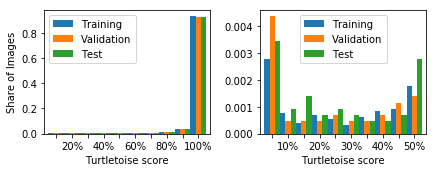

In [33]:
fig_1st_probs, ax_1st_probs = plt.subplots(nrows=1, ncols=2, figsize=(6.17, 2.5))

full_train = crop_train_groupby_bin.count()/len(crop_first_stage_cls_prob_train)
full_val = crop_val_groupby_bin.count()/len(crop_first_stage_cls_prob_val)
full_test = crop_test_groupby_bin.count()/len(crop_first_stage_cls_prob_test)

full_train.index = full_val.index
full_test.index = full_val.index

pd.concat([full_train, full_val, full_test], axis=1).plot.bar(ax=ax_1st_probs[0], width=1.0)

ax_1st_probs[0].set_xlabel('Turtletoise score')
ax_1st_probs[0].set_ylabel('Share of Images')
ax_1st_probs[0].legend(labels=['Training', 'Validation', 'Test'])
x_ticks = ['', '20%', '', '40%', '', '60%', '', '80%','', '100%']
ax_1st_probs[0].set_xticklabels(x_ticks, rotation=0.5)

b50_train = crop_train_groupby_bin_below_50.count()/len(crop_first_stage_cls_prob_train)
b50_val = crop_val_groupby_bin_below_50.count()/len(crop_first_stage_cls_prob_val)
b50_test = crop_test_groupby_bin_below_50.count()/len(crop_first_stage_cls_prob_test)

b50_train.index = b50_val.index
b50_test.index = b50_val.index

pd.concat([b50_train,b50_val, b50_test], axis=1).plot.bar(ax=ax_1st_probs[1], width=1.0)
#
ax_1st_probs[1].set_xlabel('Turtletoise score')
ax_1st_probs[1].set_ylabel('')
ax_1st_probs[1].legend(labels=['Training', 'Validation', 'Test'])
x_ticks = ['', '10%', '', '20%', '', '30%', '', '40%','', '50%']
ax_1st_probs[1].set_xticklabels(x_ticks, rotation=0.5)
#
fig_1st_probs.tight_layout()
fig_1st_probs.savefig('./results/f_rcnn/first_stage/plots/objectness_hist.png', dpi=300)

# Examples iamges for quantiles of turtletoise classifier confidence

In [4]:
from ast import literal_eval
import numpy as np
def str_to_list(x):
    try:
        return literal_eval(x)
    except:
        return np.nan 
img_stats = pd.read_csv('./results/data_analysis/image_level_statistics.csv', index_col='img_name', 
                        converters={'box_coords': str_to_list}) # the converter is needed to recover a list format

In [5]:
val_img_stats = pd.merge(img_stats, crop_first_stage_cls_prob_val, left_index=True, right_index=True)

In [6]:
val_img_stats_bboxes = val_img_stats[val_img_stats.bboxes]

In [7]:
def sample_img_between(lower_prob, upper_prob, df, random_state):
    prob_filter = (df.prob > lower_prob) & (df.prob <= upper_prob)
    sample = df[prob_filter].sample(n=1, random_state=random_state)
    return sample

In [8]:
sample_val_q4 = sample_img_between(0.75,1, val_img_stats_bboxes, 9192017)
sample_val_q3 = sample_img_between(0.5,0.75, val_img_stats_bboxes, 9192017)
sample_val_q2 = sample_img_between(0.25,0.5, val_img_stats_bboxes, 9192017)
sample_val_q1 = sample_img_between(0,0.25, val_img_stats_bboxes, 9192017)

sample_1st_stage = pd.concat([sample_val_q4, sample_val_q3, sample_val_q2, sample_val_q1])

In [9]:
sample_1st_stage

,Unnamed: 0,WnID,bboxes,sample,pixel_w,pixel_h,Species,box_coords,n_boxes,prob
n01667778_3263,12792,n01667778,True,val,500,357,Terrapin,"[[193, 89, 436, 249], [50, 196, 240, 320]]",2.0,0.894039
n01669191_1331,18002,n01669191,True,val,500,333,Box Turtle,"[[183, 94, 344, 219]]",1.0,0.745696
n01664065_1529,2376,n01664065,True,val,500,375,Loggerhead,"[[204, 204, 252, 241], [50, 139, 265, 249]]",2.0,0.263857
n01667778_9256,13434,n01667778,True,val,500,333,Terrapin,"[[325, 185, 391, 223], [352, 167, 403, 192]]",2.0,0.101388


In [10]:
import os

def row_to_img_path(row):
    path = os.path.join('./data/images/', 
                        row[1]['sample'], 
                        row[1]['WnID'], 
                        row[0] + '.JPEG')
    return path

In [11]:
#from first_stage_output_single_img import first_stage_output
from first_stage_output_single_img import first_stage_output

Using TensorFlow backend.


In [12]:
keras_frcnn_path = './keras-frcnn'
config_path = './saved_models/f_rcnn/first_stage/config.pickle'
input_weight_path = './saved_models/f_rcnn/first_stage/model_frcnn.hdf5'
num_rois = 100

In [13]:
img_paths = []
for i, row in enumerate(sample_1st_stage.iterrows()):
    img_path = row_to_img_path(row)
    img_paths.append(img_path)

This is not neat but have to do it this way - calling this in the loop loads model repeatedly with somehow causes issues.

In [14]:
results_dict = first_stage_output(img_paths, num_rois,
                                  keras_frcnn_path,
                                  config_path, 
                                  input_weight_path)

Loading weights from ./saved_models/f_rcnn/first_stage/model_frcnn.hdf5


Output is dict with img_path as keys 

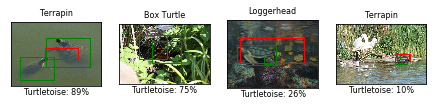

In [15]:
fig_p_samples, ax_p_samples = plt.subplots(ncols=4, nrows=1, figsize=(6.17, 2.5))

from PIL import Image

for i, row in enumerate(sample_1st_stage.iterrows()):
    img_path = row_to_img_path(row)
    img = Image.open(img_path)
    best_box, highest_prob = results_dict[img_path]
    ax = ax_p_samples[i]
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('Turtletoise: {}%'.format(round(100*row[1].prob)), fontsize=8, labelpad=2)
    ax.set_title(row[1].Species, fontsize=8)
    
    import matplotlib.patches as patches
    #add the ground truth boxes (green)
    for box in row[1].box_coords:
        # this is slightly ugly
        box = [int(coord) for coord in box]
        rect = patches.Rectangle((box[0], box[1]),
                                 box[2]-box[0], 
                                 box[3]-box[1],linewidth=1, edgecolor='g', facecolor='none')
        ax.add_patch(rect)
    
    #add the best predicted box (red)
    rect = patches.Rectangle((best_box[0], best_box[1]),
                             best_box[2]-best_box[0], 
                             best_box[3]-best_box[1],
                             linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

fig_p_samples.tight_layout()
fig_p_samples.savefig('./results/f_rcnn/first_stage/plots/objectness.png', dpi=300)#, bbox_extra_artists=(lgd,), bbox_inches='tight')